In [1]:
library('igraph')
library('Matrix')


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



# Qestion 6

In [2]:
# build the graph
path="E:/Quarter 3/Large Scale Social and Complex Networks Design and Algorithms/project5/new_SF.csv"
el=read.csv(path) # read  the 'el.with.weights.csv' file
el[,1]=as.character(el[,1]) #Because the vertex IDs in this dataset are numbers, we make sure igraph knows these should be treated as characters. Otherwise, it'll create problems (see page on data import)
el[,2]=as.character(el[,2])
el=as.matrix(el) #igraph needs the edgelist to be in matrix format
g=graph.edgelist(el[,1:2],directed=FALSE) #We first greate a network from the first two columns, which has the list of vertices
E(g)$weight=as.numeric(el[,3]) #We then add the edge weights to this network by assigning an edge attribute called 'weight'.

In [3]:
# add attributes to vertices
path = "E:/Quarter 3/Large Scale Social and Complex Networks Design and Algorithms/project5/id_info.csv"
info = read.csv(path)
id2street = as.list(setNames(as.character(info$name), info$movement))
id2coordinator_x = as.list(setNames(info$x, info$movement))
id2coordinator_y = as.list(setNames(info$y, info$movement))

V(g)$street_name = id2street[V(g)$name]
V(g)$loc_x = id2coordinator_x[V(g)$name]
V(g)$loc_y = id2coordinator_y[V(g)$name]


In [4]:
c = components(g)
gcc = induced.subgraph(g, which(c$membership == which.max(c$csize)))
print(length(V(gcc)))
print(length(E(gcc)))

[1] 1880
[1] 311802


# Question 7

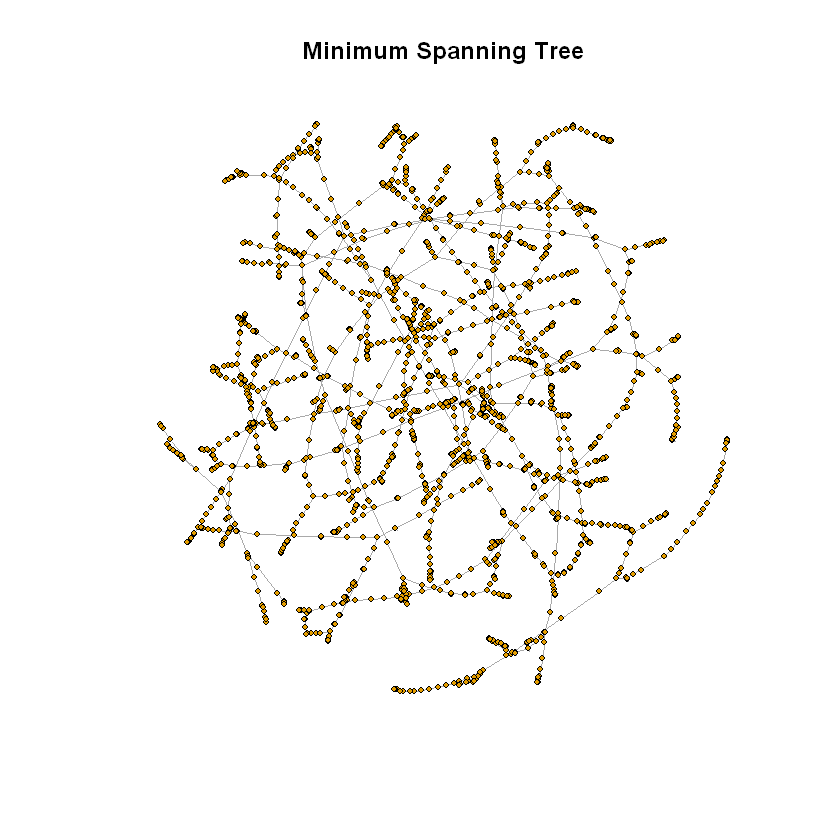

In [5]:
g_mst = mst(gcc, weights = E(gcc)$weight, algorithm="prim")
plot(g_mst, vertex.color = rep(1, vcount(g_mst)), vertex.size = rep(2, vcount(g_mst)), vertex.label = NA, main="Minimum Spanning Tree")

In [6]:
print(V(g_mst)['374']$street_name)
print(V(g_mst)['2076']$street_name)
print(V(g_mst)['2446']$street_name)
print(V(g_mst)['2328']$street_name)

[[1]]
[1] "3800 Longbridge Drive, Modesto"

[[1]]
[1] "5400 Stoddard Road, Modesto"

[[1]]
[1] "500 South Stockton Avenue, Ripon"

[[1]]
[1] "19200 Murphy Road, Ripon"



# Question 8

In [6]:
adj_mat = as_adjacency_matrix(gcc, type = "both", attr = "weight")

In [8]:
iteration = 0
count = 0
while(iteration<1000){
    v1 = sample(V(gcc), 1)$name
    v2 = sample(V(gcc), 1)$name
    v3 = sample(V(gcc), 1)$name
    
    if(v1!=v2 && v2!=v3 && v3!=v1){
        l1 = adj_mat[v1,v2]
        l2 = adj_mat[v2,v3]
        l3 = adj_mat[v1,v3]
        
        if(l1*l2*l3!=0){
            iteration = iteration + 1
            if(l1+l2>l3 && l1+l3>l2 && l2+l3>l1) count = count+1
        }
    }
    
}

In [9]:
count

[1] 941

# Question 9

In [7]:
min_distance = function(graph, node1, node2){
    if(get.edge.ids(graph, c(node1, node2))==0){
        path = shortest_paths(graph, from=node1, to=node2, weights=E(graph)$weight)
        tot <- 0
        for(k in 1:(length(path$vpath[[1]])-1))
            tot <- tot+E(graph)[get.edge.ids(graph,c(path$vpath[[1]][k],path$vpath[[1]][k+1]))]$weight
        return(tot)
    }
    else
        return (E(graph)[get.edge.ids(graph, c(node1, node2))]$weight)
}

In [8]:
dfs = dfs(graph=g_mst, root=V(g_mst)[1], order=TRUE, order.out=FALSE, father=FALSE)

In [18]:
g_tsp = make_empty_graph(n = vcount(gcc), directed = FALSE)
edge_weight = c()
node <- as.matrix(dfs$order)
distance = 0
for(i in 1:1879){
    g_tsp = add_edges(g_tsp, c(node[i], node[i+1]))
    weight = min_distance(gcc, node[i], node[i+1])
    distance = distance + weight
    edge_weight = c(edge_weight, weight)
}

g_tsp = add_edges(g_tsp, c(node[1], node[1880]))
weight = min_distance(gcc, node[1], node[1880])
distance = distance + weight
edge_weight = c(edge_weight, weight)

pseudo_optimal = sum(E(g_mst)$weight)
distance/pseudo_optimal


[1] 1.655581

# Question 10

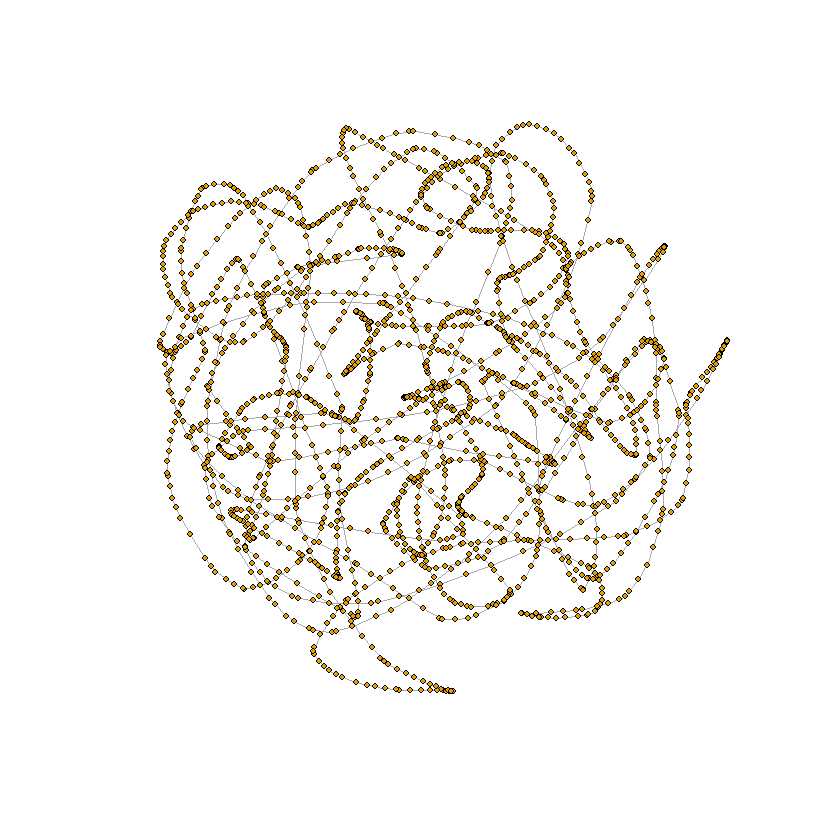

In [32]:
g_tsp = set_edge_attr(g_tsp, "weight", value = edge_weight)
x = c()
y = c()
for(i in 1:1880){
    x = c(x, as.numeric(V(g_mst)[node[i]]$loc_x))
    y = c(y, as.numeric(V(g_mst)[node[i]]$loc_y))
}
coordinate = data.frame(X=x, Y=y)
coordinate = as.matrix(coordinate)
plot(g_tsp,vertex.size=2, vertex.label=NA)

In [38]:
for(i in 1:5){
    print(V(g_mst)[node[i]])
    print(V(g_mst)[node[i]]$street_name)
}

+ 1/1880 vertex, named, from caf5bae:
[1] 102
[[1]]
[1] "500 Mount Street, East Richmond, Richmond"

+ 1/1880 vertex, named, from caf5bae:
[1] 1651
[[1]]
[1] "600 39th Street, North & East, Richmond"

+ 1/1880 vertex, named, from caf5bae:
[1] 1655
[[1]]
[1] "100 South 35th Street, Pullman, Richmond"

+ 1/1880 vertex, named, from caf5bae:
[1] 1047
[[1]]
[1] "1700 Eastshore Boulevard, El Cerrito"

+ 1/1880 vertex, named, from caf5bae:
[1] 417
[[1]]
[1] "4400 Bell Avenue, Eastshore, Richmond"

